#Twelve Data API

In [1]:
# import pandas as pd
# import requests
# import json

In [2]:
# api_key = '9439281b2cda4dd59f6398f2b4b867a0'

# symbol = 'BTC/USD'

# interval = '8h'

# order = 'asc'

# start_date = '2014-10-01'

# end_date = '2021-10-20'

In [3]:
# api_url = f'https://api.twelvedata.com/time_series?apikey={api_key}&interval={interval}&order={order}&symbol={symbol}&start_date={start_date}&end_date={end_date}'

# data = requests.get(api_url).json()
# data


In [4]:
# data_final = pd.DataFrame(data['values'])
# print(data_final)

#Yahoo Finance

##Data Collection and features

In [5]:
%pip install yfinance

In [6]:
%pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=dfb729ab7b728a50da871be1d01db8d390ea6ebedc5d6d72c5d0205be7bef8da
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import pandas_ta as ta
data = yf.download(tickers = 'BTC-USD', start = None ,end = None)

[*********************100%%**********************]  1 of 1 completed


In [8]:
data.reset_index(inplace=True)
data.head(15)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
5,2014-09-22,399.100006,406.915985,397.130005,402.152008,402.152008,24127600
6,2014-09-23,402.092010,441.557007,396.196991,435.790985,435.790985,45099500
7,2014-09-24,435.751007,436.112000,421.131989,423.204987,423.204987,30627700
8,2014-09-25,423.156006,423.519989,409.467987,411.574005,411.574005,26814400
9,2014-09-26,411.428986,414.937988,400.009003,404.424988,404.424988,21460800


In [9]:
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
3579,2024-07-05,57022.808594,57497.152344,53717.375000,56662.375000,56662.375000,55417544033
3580,2024-07-06,56659.074219,58472.546875,56038.960938,58303.539062,58303.539062,20610320577
3581,2024-07-07,58239.429688,58371.121094,55793.324219,55849.109375,55849.109375,20553359505
3582,2024-07-08,55849.574219,58131.335938,54321.019531,56705.097656,56705.097656,39766159899
3583,2024-07-09,56704.597656,57890.074219,56410.488281,57686.949219,57686.949219,28237838336


In [10]:
# Adding indicators
# data['SMA']=ta.sma(data['Adj Close'], length=13)
data['EMA']=ta.ema(data['Adj Close'], length=14)
data['RSI']=ta.rsi(data['Adj Close'], length=14)

# Calculate MACD and extract its components
macd = ta.macd(data['Adj Close'], fast=13, slow=26, signal=9)
data['MACD']=macd['MACD_13_26_9']         #macd line
data['MACD_SIGNAL'] = macd['MACDs_13_26_9'] #macd signal line
data['MACD_HIST'] = macd['MACDh_13_26_9']   #macd histogram

data['ATR']=ta.atr(data['High'], data['Low'], data['Adj Close'])

data['OBV']=ta.obv(data['Adj Close'], data['Volume'])

data['CCI']=ta.cci(data['High'], data['Low'], data['Adj Close'], length=14)

data[['ADX_14', 'DMP_14', 'DMN_14']] = ta.adx(data['High'], data['Low'], data['Adj Close'])


data['TargetNextClose'] = data['Adj Close'].shift(-1)

# data.dropna(inplace=True)
data.reset_index(inplace = True)
data.isna().sum()

index               0
Date                0
Open                0
High                0
Low                 0
Close               0
Adj Close           0
Volume              0
EMA                13
RSI                14
MACD               25
MACD_SIGNAL        33
MACD_HIST          33
ATR                14
OBV                 0
CCI                13
ADX_14             27
DMP_14             14
DMN_14             14
TargetNextClose     1
dtype: int64

##Data preparation

In [12]:
data.drop(['index','Close','DMP_14', 'DMN_14'], axis=1, inplace=True)

In [13]:
data.dropna(inplace=True)

In [14]:
data.head()

,Date,Open,High,Low,Adj Close,Volume,EMA,RSI,MACD,MACD_SIGNAL,MACD_HIST,ATR,OBV,CCI,ADX_14,TargetNextClose
33,2014-10-20,389.230988,390.084015,378.252014,382.845001,16419000,381.307873,48.756987,-4.139902,-9.309693,5.169792,20.387106,-18663162.0,36.918838,21.224410,386.475006
34,2014-10-21,382.420990,392.645996,380.834015,386.475006,14188900,381.996824,50.393685,-3.493462,-8.146447,4.652985,19.720984,-4474262.0,41.555209,19.402534,383.157990
35,2014-10-22,386.118011,388.575989,382.248993,383.157990,11641300,382.151646,48.858026,-3.171602,-7.151478,3.979876,18.686993,-16115562.0,21.311364,17.776621,358.416992
36,2014-10-23,382.962006,385.048004,356.446991,358.416992,26456900,378.987025,39.250383,-4.584357,-6.638054,2.053697,19.447947,-42572462.0,-109.834971,18.046700,358.345001
37,2014-10-24,358.591003,364.345001,353.304993,358.345001,15585700,376.234756,39.226211,-5.662032,-6.442850,0.780818,18.806012,-58158162.0,-157.946935,18.463084,347.270996


In [15]:
data.shape

(3550, 16)

In [16]:
data_set = data.iloc[:, 1:-1]
data_set.head()

,Open,High,Low,Adj Close,Volume,EMA,RSI,MACD,MACD_SIGNAL,MACD_HIST,ATR,OBV,CCI,ADX_14
33,389.230988,390.084015,378.252014,382.845001,16419000,381.307873,48.756987,-4.139902,-9.309693,5.169792,20.387106,-18663162.0,36.918838,21.224410
34,382.420990,392.645996,380.834015,386.475006,14188900,381.996824,50.393685,-3.493462,-8.146447,4.652985,19.720984,-4474262.0,41.555209,19.402534
35,386.118011,388.575989,382.248993,383.157990,11641300,382.151646,48.858026,-3.171602,-7.151478,3.979876,18.686993,-16115562.0,21.311364,17.776621
36,382.962006,385.048004,356.446991,358.416992,26456900,378.987025,39.250383,-4.584357,-6.638054,2.053697,19.447947,-42572462.0,-109.834971,18.046700
37,358.591003,364.345001,353.304993,358.345001,15585700,376.234756,39.226211,-5.662032,-6.442850,0.780818,18.806012,-58158162.0,-157.946935,18.463084


In [17]:
#Normalizing the data
data_max = data_set.max()
data_set_scaled = data_set.divide(data_max) * 10
data_set_scaled.head()

,Open,High,Low,Adj Close,Volume,EMA,RSI,MACD,MACD_SIGNAL,MACD_HIST,ATR,OBV,CCI,ADX_14
33,0.053261,0.052893,0.053025,0.052385,0.000468,0.055096,5.170291,-0.008193,-0.019951,0.045115,0.040749,-0.000069,0.931451,2.828208
34,0.052330,0.053240,0.053387,0.052881,0.000404,0.055195,5.343850,-0.006914,-0.017458,0.040605,0.039417,-0.000017,1.048425,2.585438
35,0.052835,0.052688,0.053586,0.052427,0.000332,0.055217,5.181005,-0.006277,-0.015326,0.034731,0.037351,-0.000060,0.537679,2.368781
36,0.052404,0.052210,0.049969,0.049042,0.000754,0.054760,4.162191,-0.009073,-0.014225,0.017922,0.038872,-0.000158,-2.771102,2.404770
37,0.049069,0.049403,0.049528,0.049032,0.000444,0.054363,4.159628,-0.011205,-0.013807,0.006814,0.037589,-0.000216,-3.984952,2.460254


In [18]:
# multiple feature from data provided to the model
values = data_set_scaled.values
X = []

backcandles = 30
print(data_set_scaled.shape[0])
for j in range(14):#data_set_scaled[0].size):#2 columns are target not X
    X.append([])
    for i in range(backcandles, data_set_scaled.shape[0]):#backcandles+2
        X[j].append(values[i-backcandles:i, j])

#move axis from 0 to position 2
X=np.moveaxis(X, [0], [2])

#Erase first elements of y because of backcandles to match X length
# Choose -1 for last column
X, yi =np.array(X), np.array(values[backcandles:,-1])
y=np.reshape(yi,(len(yi),1))

# print(X)
print(X.shape)
# print(y)
print(y.shape)

3550
(3520, 30, 14)
(3520, 1)


In [19]:
# split data into train test sets
splitlimit = int(len(X)*0.7)
print(splitlimit)
X_train, X_test = X[:splitlimit], X[splitlimit:]
y_train, y_test = y[:splitlimit], y[splitlimit:]
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)
print(y_train)

2464
(2464, 30, 14)
(1056, 30, 14)
(2464, 1)
(1056, 1)
[[4.16340883]
 [4.04943432]
 [3.84938054]
 ...
 [4.92776614]
 [4.95576254]
 [4.85840399]]


##Model training and testing

In [20]:
from keras.models import Sequential
from keras.layers import TimeDistributed

import tensorflow as tf
import keras
from keras import optimizers
from keras.callbacks import History
from keras.models import Model
from keras.layers import Dense, Dropout, LSTM, Input, Activation, concatenate
import numpy as np
#tf.random.set_seed(20)
np.random.seed(10)

lstm_input = Input(shape=(backcandles, 14), name='lstm_input')
inputs = LSTM(150, name='first_layer')(lstm_input)
inputs2 = Dense(1, name='dense_layer')(inputs)
output = Activation('linear', name='output')(inputs2)
model = Model(inputs=lstm_input, outputs=output)
adam = optimizers.Adam()
model.compile(optimizer=adam, loss='mse')
model.fit(x=X_train, y=y_train, batch_size=15, epochs=100, shuffle=True, validation_split = 0.2)

Epoch 1/100
132/132 [==============================] - 4s 9ms/step - loss: 1.2307 - val_loss: 0.4739
Epoch 2/100
132/132 [==============================] - 1s 5ms/step - loss: 0.0597 - val_loss: 0.3818
Epoch 3/100
132/132 [==============================] - 1s 6ms/step - loss: 0.0394 - val_loss: 0.3660
Epoch 4/100
132/132 [==============================] - 1s 5ms/step - loss: 0.0309 - val_loss: 0.2926
Epoch 5/100
132/132 [==============================] - 1s 6ms/step - loss: 0.0252 - val_loss: 0.2704
Epoch 6/100
132/132 [==============================] - 1s 6ms/step - loss: 0.0239 - val_loss: 0.2404
Epoch 7/100
132/132 [==============================] - 1s 5ms/step - loss: 0.0222 - val_loss: 0.2446
Epoch 8/100
132/132 [==============================] - 1s 6ms/step - loss: 0.0207 - val_loss: 0.2367
Epoch 9/100
132/132 [==============================] - 1s 7ms/step - loss: 0.0177 - val_loss: 0.1808
Epoch 10/100
132/132 [==============================] - 1s 7ms/step - loss: 0.0158 - val_lo

In [21]:
y_pred = model.predict(X_test)
#y_pred=np.where(y_pred > 0.43, 1,0)
for i in range(10):
    print(y_pred[i], y_test[i])

33/33 [==============================] - 0s 2ms/step
[4.507006] [4.75312737]
[4.391095] [4.71458809]
[4.3881874] [4.79134493]
[4.536629] [4.8780122]
[4.551845] [4.94587221]
[4.709006] [5.05246104]
[4.758075] [4.99981704]
[4.5842223] [4.89824269]
[4.5998344] [4.73003243]
[4.3176455] [4.57270468]


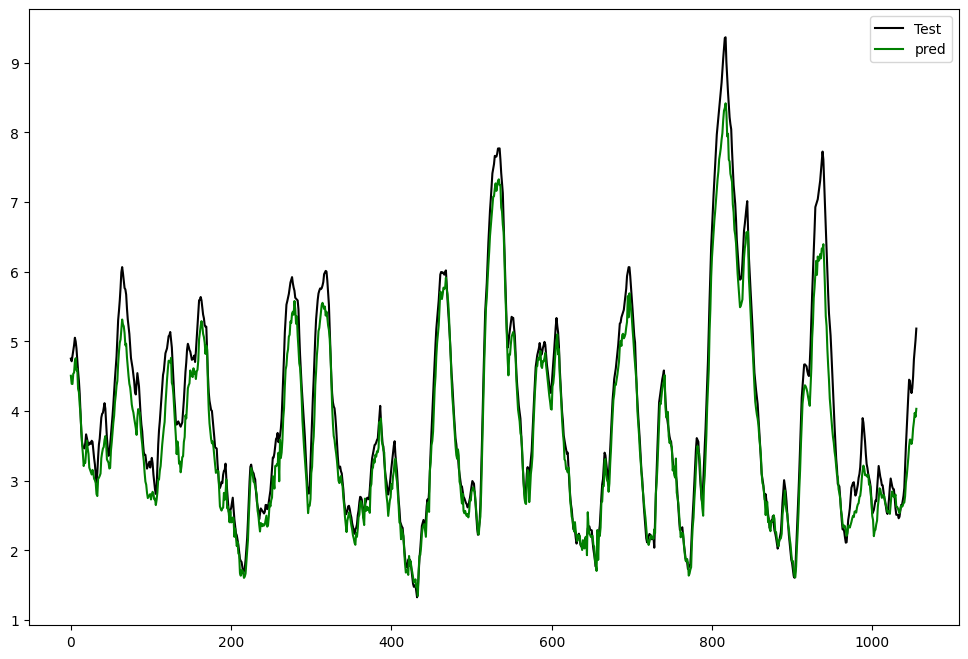

In [23]:
plt.figure(figsize=(12,8))
plt.plot(y_test, color = 'black', label = 'Test')
plt.plot(y_pred, color = 'green', label = 'pred')
plt.legend()
plt.show()